In [7]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np   

from sklearn.linear_model import LinearRegression

import pandas as pd    

import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler  
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [8]:
df=pd.read_csv("./US_Heart_Patients_2.csv")

In [9]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [11]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']


In [12]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [13]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [15]:
df.isnull().sum()*100/df.shape[0]

Gender               0.188679
age                  0.047170
education            2.594340
currentSmoker        0.070755
cigsPerDay           0.731132
BP Meds              1.415094
prevalentStroke      0.212264
prevalentHyp         0.047170
diabetes             0.047170
tot cholesterol      1.415094
Systolic BP          0.094340
Diastolic BP         0.117925
BMI                  0.566038
heartRate            0.094340
glucose              9.221698
Heart-Att            0.000000
Unnamed: 16        100.000000
Unnamed: 17        100.000000
Unnamed: 18        100.000000
Unnamed: 19        100.000000
Unnamed: 20        100.000000
Unnamed: 21        100.000000
dtype: float64

In [16]:
for i in num:
    df[i].fillna(df[i].mean(),inplace=True)

In [17]:
df.isnull().sum()

Gender                8
age                   0
education           110
currentSmoker         3
cigsPerDay            0
BP Meds              60
prevalentStroke       9
prevalentHyp          2
diabetes              2
tot cholesterol       0
Systolic BP           0
Diastolic BP          0
BMI                   0
heartRate             0
glucose               0
Heart-Att             0
Unnamed: 16        4240
Unnamed: 17        4240
Unnamed: 18        4240
Unnamed: 19        4240
Unnamed: 20        4240
Unnamed: 21        4240
dtype: int64

In [18]:
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace=True)

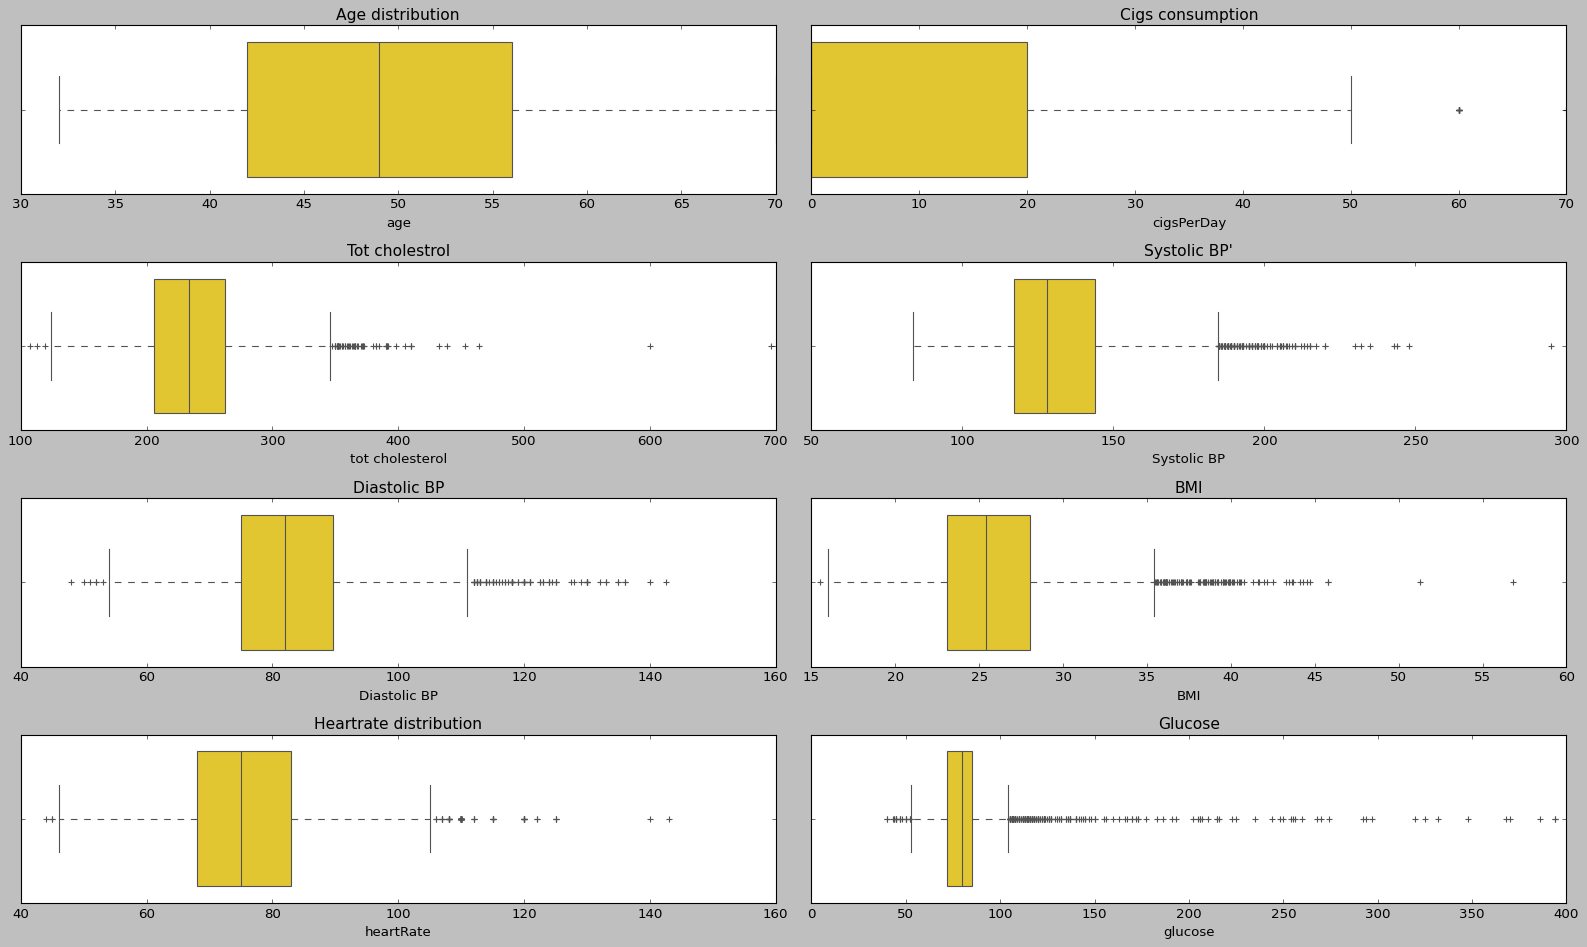

In [21]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize =(20,12))
plt.tight_layout()

a=sns.boxplot(df['age'],orient='h',ax=axes[0][0],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Age distribution",fontsize=14)

a=sns.boxplot(df['cigsPerDay'],orient='h',ax=axes[0][1],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Cigs consumption",fontsize=14)

a=sns.boxplot(df['tot cholesterol'],orient='h',ax=axes[1][0],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Tot cholestrol",fontsize=14)

a=sns.boxplot(df['Systolic BP'],orient='h',ax=axes[1][1],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Systolic BP'",fontsize=14)

a=sns.boxplot(df['Diastolic BP'],orient='h',ax=axes[2][0],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Diastolic BP",fontsize=14)

a=sns.boxplot(df['BMI'],orient='h',ax=axes[2][1],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("BMI",fontsize=14)

a=sns.boxplot(df['heartRate'],orient='h',ax=axes[3][0],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Heartrate distribution",fontsize=14)

a=sns.boxplot(df['glucose'],orient='h',ax=axes[3][1],palette=['#feda15', '#173f5f', '#3caea3','#ed553b','#20639b'])
a.set_title("Glucose",fontsize=14)

plt.tight_layout();
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN